In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from scipy.stats import linregress

# set default params for matplotlib : 
plt.rcParams['font.size'] = 14
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
data = pd.read_excel('data.xlsx' , sheet_name=3, nrows = 11 )
data

,Number of Fringes,Initial Distance (mm),Final Distance (mm),Distance Moved By Mirror (mm),Wavelength(nm)
0,20,21.4749,21.4835,0.0086,860.000000
1,30,21.4835,21.4941,0.0106,706.666667
2,40,21.4941,21.5074,0.0133,665.000000
3,50,21.5074,21.5240,0.0166,664.000000
4,60,21.5240,21.5436,0.0196,653.333333
5,70,21.5436,21.5662,0.0226,645.714286
6,80,21.5662,21.5925,0.0263,657.500000
7,90,21.5925,21.6231,0.0306,680.000000
8,100,21.6231,21.6552,0.0321,642.000000
9,110,21.6552,21.6916,0.0364,661.818182


In [3]:
x = data['Number of Fringes']
y = data['Distance Moved By Mirror (mm)']

In [4]:
result = linregress( x , y )
slope , intersept = result[:2]
lambda_ = 2*slope*1e6 # in nm 

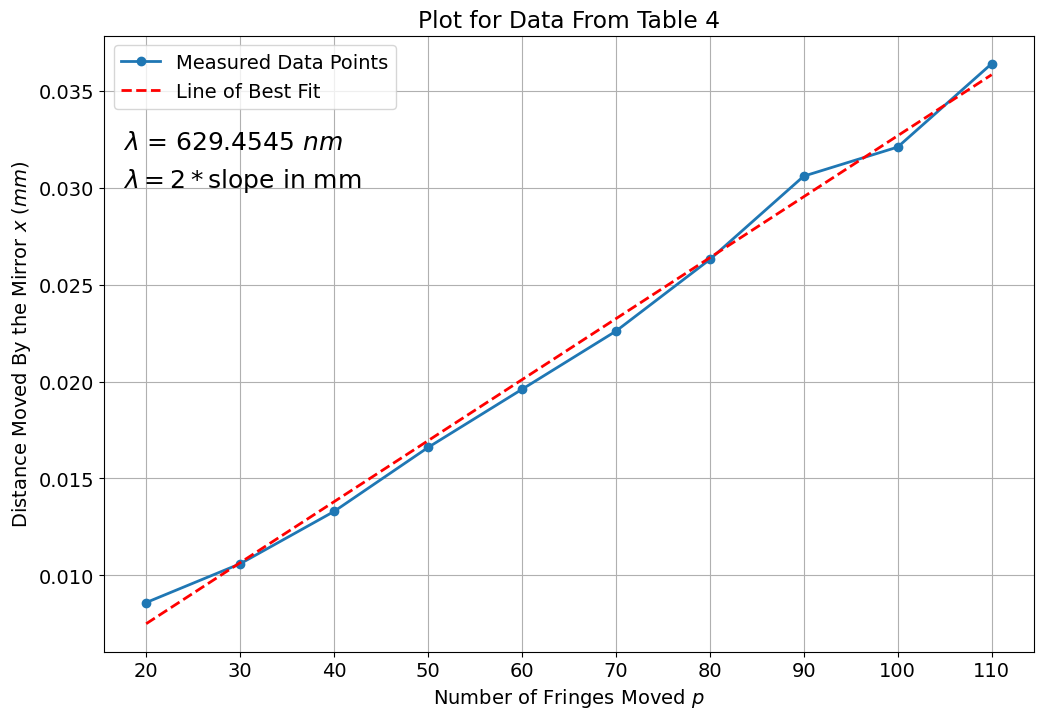

In [5]:
plt.plot( x , y, '-o' , label = 'Measured Data Points')
plt.plot( x , x*slope + intersept , 'r--' , label = 'Line of Best Fit')
plt.xlabel(r'Number of Fringes Moved $p$')
plt.ylabel(r'Distance Moved By the Mirror $x$ ($mm$)')
plt.xticks([i for i in range(20,120,10)])
plt.grid()
plt.legend()
plt.text(
 17.5 , 0.032 , 
 r"$\lambda$ = {:.4f} $nm$".format(lambda_) , 
 fontsize=18, color='black'
)
plt.text(
 17.5 , 0.030 , 
 r'$\lambda = 2*\text{slope}$ in mm' , 
 fontsize=18, color='black'
)
plt.title('Plot for Data From Table 4'); 

In [6]:
2*result.stderr*1e6 

15.631429806512958